## Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

## Wikipedia Dataset

In [ ]:
# Import Wikipedia data

df_wiki = pd.read_csv('https://raw.githubusercontent.com/shoond/portfolio/datasets/Wikipedia.csv')

df_wiki.describe
df_wiki.head()
df_wiki.dtypes

Vandal             int64
Minor              int64
LoggedIn           int64
HTTP               int64
NumWordsAdded      int64
NumWordsRemoved    int64
dtype: object

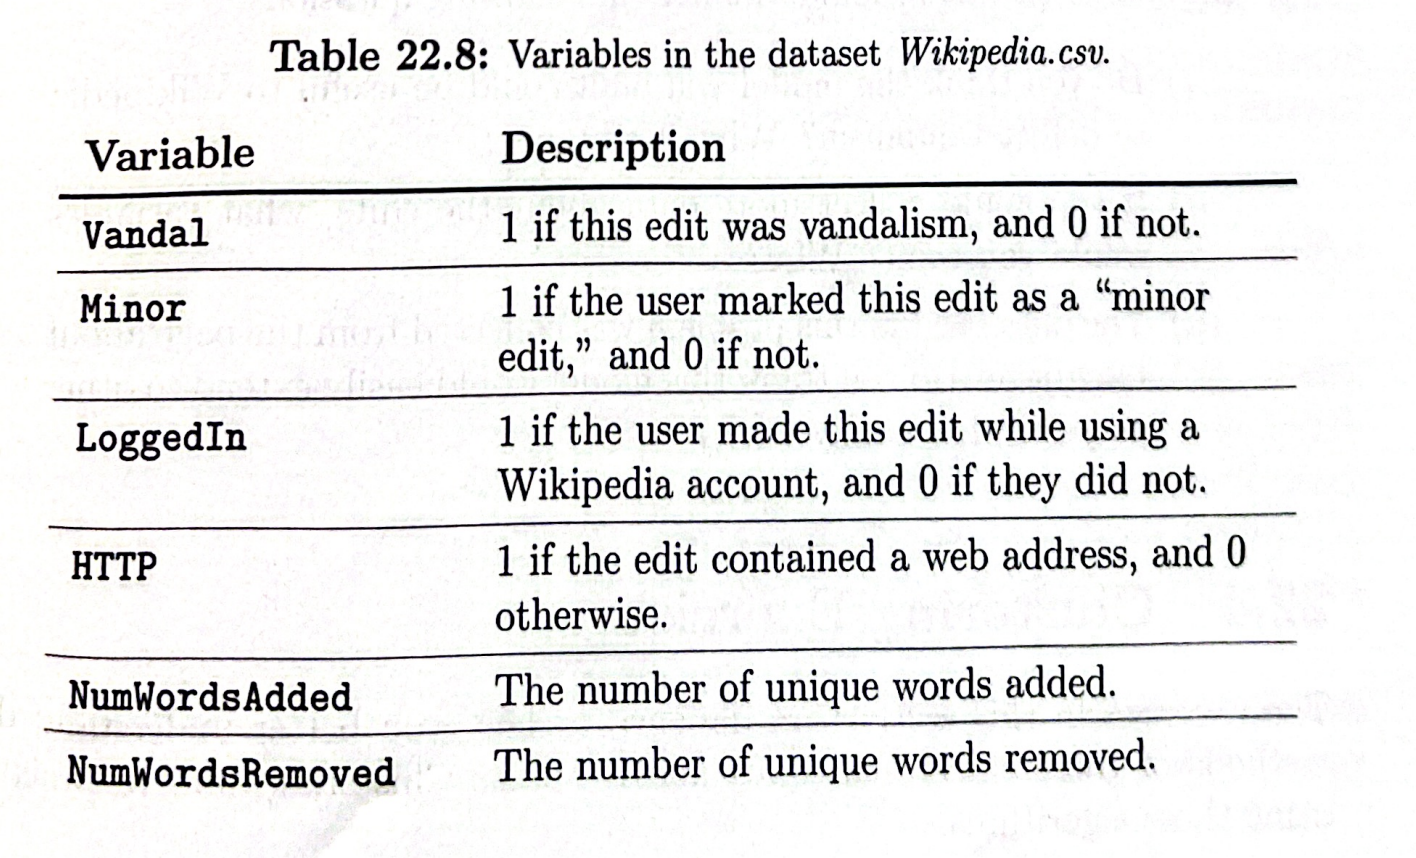

## a_i

How many cases of vandalism were detected in the history of this page?
> 1815 cases of vandalism

In [ ]:
vandal = df_wiki[df_wiki['Vandal'] == 1]
print(vandal.count())

Vandal             1815
Minor              1815
LoggedIn           1815
HTTP               1815
NumWordsAdded      1815
NumWordsRemoved    1815
dtype: int64


## a_ii

What is the average number of words added?
> 4.05 average words added

What is the average number of words that were removed?
> 3.51 average words removed


In [ ]:
words_added = df_wiki['NumWordsAdded']
print(words_added.mean())

words_removed = df_wiki['NumWordsRemoved']
print(words_removed.mean())

4.050051599587204
3.5128998968008256


## a_iii
Which variable is the most correlated with the variable 'Vandal'?
> LoggedIn with -0.429 correlation

In [ ]:
df_wiki.corr()

Vandal     Minor  LoggedIn      HTTP  NumWordsAdded  \
Vandal           1.000000 -0.213995 -0.429255  0.151554      -0.000729   
Minor           -0.213995  1.000000  0.445166 -0.084297      -0.007726   
LoggedIn        -0.429255  0.445166  1.000000 -0.110633       0.026223   
HTTP             0.151554 -0.084297 -0.110633  1.000000       0.114421   
NumWordsAdded   -0.000729 -0.007726  0.026223  0.114421       1.000000   
NumWordsRemoved  0.036360 -0.037629 -0.036422 -0.039866       0.025235   

                 NumWordsRemoved  
Vandal                  0.036360  
Minor                  -0.037629  
LoggedIn               -0.036422  
HTTP                   -0.039866  
NumWordsAdded           0.025235  
NumWordsRemoved         1.000000

# b

Split data into trainiing and testing sets. 70% in training set.

What is the accuracy on testing set of a simple baseline method that always predicts 'not vandalism" for every edit?
> 54.43% accurate

In [ ]:
# Simple train_test_split
df_wiki_train, df_wiki_test = train_test_split(df_wiki, test_size = 0.3, random_state = 42)

df_wiki_test.head()
vandalism = np.sum(df_wiki_test['Vandal'] == 1)
no_vandalism = np.sum(df_wiki_test['Vandal'] == 0)

accuracy_novandalism = no_vandalism/(vandalism + no_vandalism)
print(accuracy_novandalism)

0.5442820292347378


# c

Build a CART model to predict 'VANDAL', using all of the other variables as indepedent variables. Use training set for this model and use validation approach as instructed.

* Split into two subsets: (x_train_1, y_train_1), (x_val, y_val)
* random seed = 42
* Choose 3 values for min_sample_leaf
    * 10, 50, 100
* Fit 3 models per hyperparameter
    * ctree_10, ctree_50, ctree_100
*Calculate accuracy of each model on val set
* Chose the model that achieved highest accuracy and note the min_samples_leaf value.
* Use full training set, to fit a final CART model using optimal min_samples_leaf.

In [ ]:
# train_test_split, but we are going make CART so need to def x_vars, y_target
x_train = df_wiki_train.drop(['Vandal'], axis=1)
y_train = df_wiki_train['Vandal']

x_train_1, x_val, y_train_1, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 42)
vandalism = np.sum(y_val == 1)
no_vandalism = np.sum(y_val == 0)

accuracy_novandalism = no_vandalism/(vandalism + no_vandalism)
print(accuracy_novandalism)

0.5221130221130221


### ctree_10
> **Accuracy = 72.73%**

( Most accurate model )

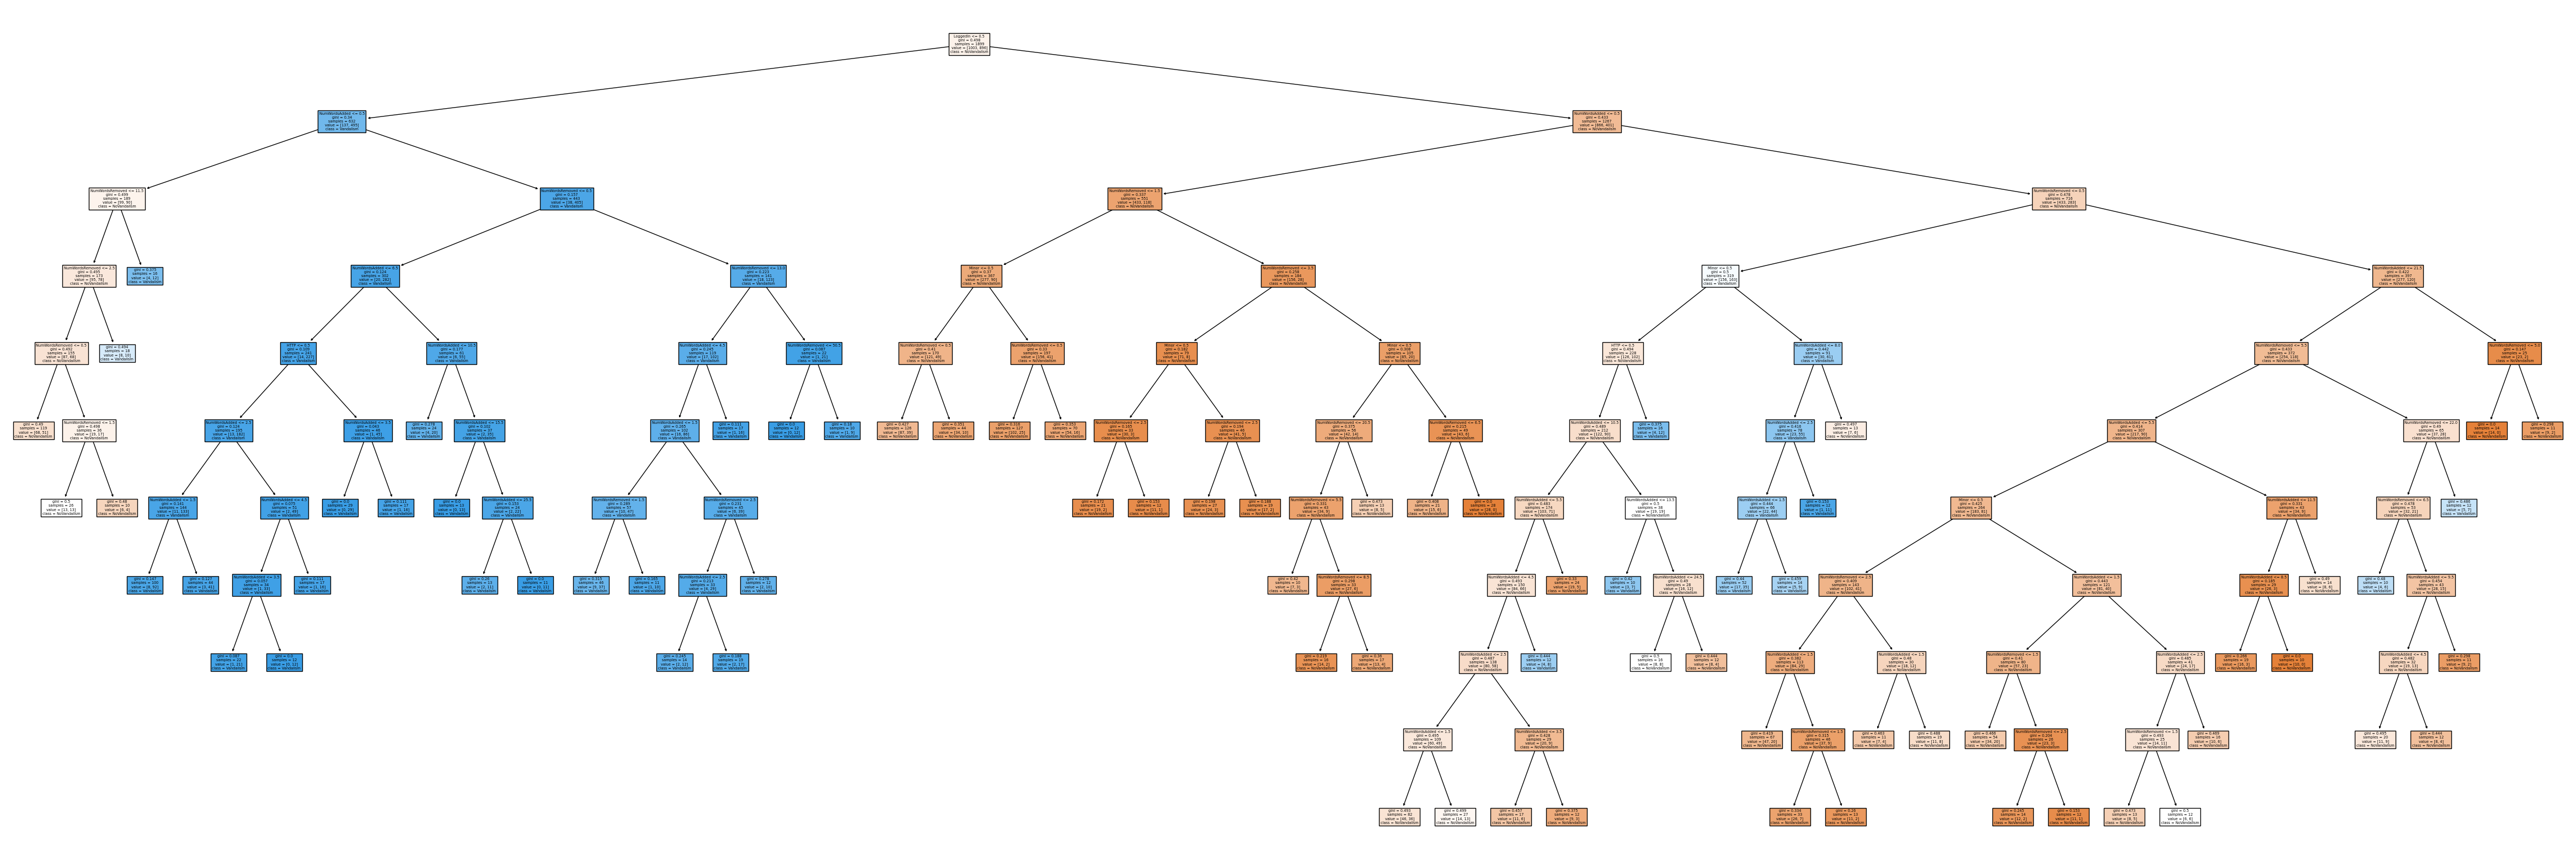

In [ ]:
#leafs = 10
dectree_10 = DecisionTreeClassifier(min_samples_leaf =10)
dectree_10.fit(x_train_1, y_train_1)

plt.figure(figsize = (60,20))

plot_tree(dectree_10, feature_names = x_train_1.columns, class_names = ['NoVandalism', 'Vandalism'], filled=True)
plt.show()

In [ ]:
#Predict ctree_10 against test data set.

y_pred_ctree_10 = dectree_10.predict(x_val)

pd.crosstab(y_val, y_pred_ctree_10)

col_0     0    1
Vandal          
0       374   51
1       171  218

In [ ]:
#Calculate accuracy of ctree_10
TP = 218
TN = 374
FP = 51
FN = 171
N = TP+TN+FP+FN
# accuracy = truths / total
acc_10 = (TP+TN)/N
print(acc_10)

0.7272727272727273


### c_tree = 50
> Accuracy = 71.99%

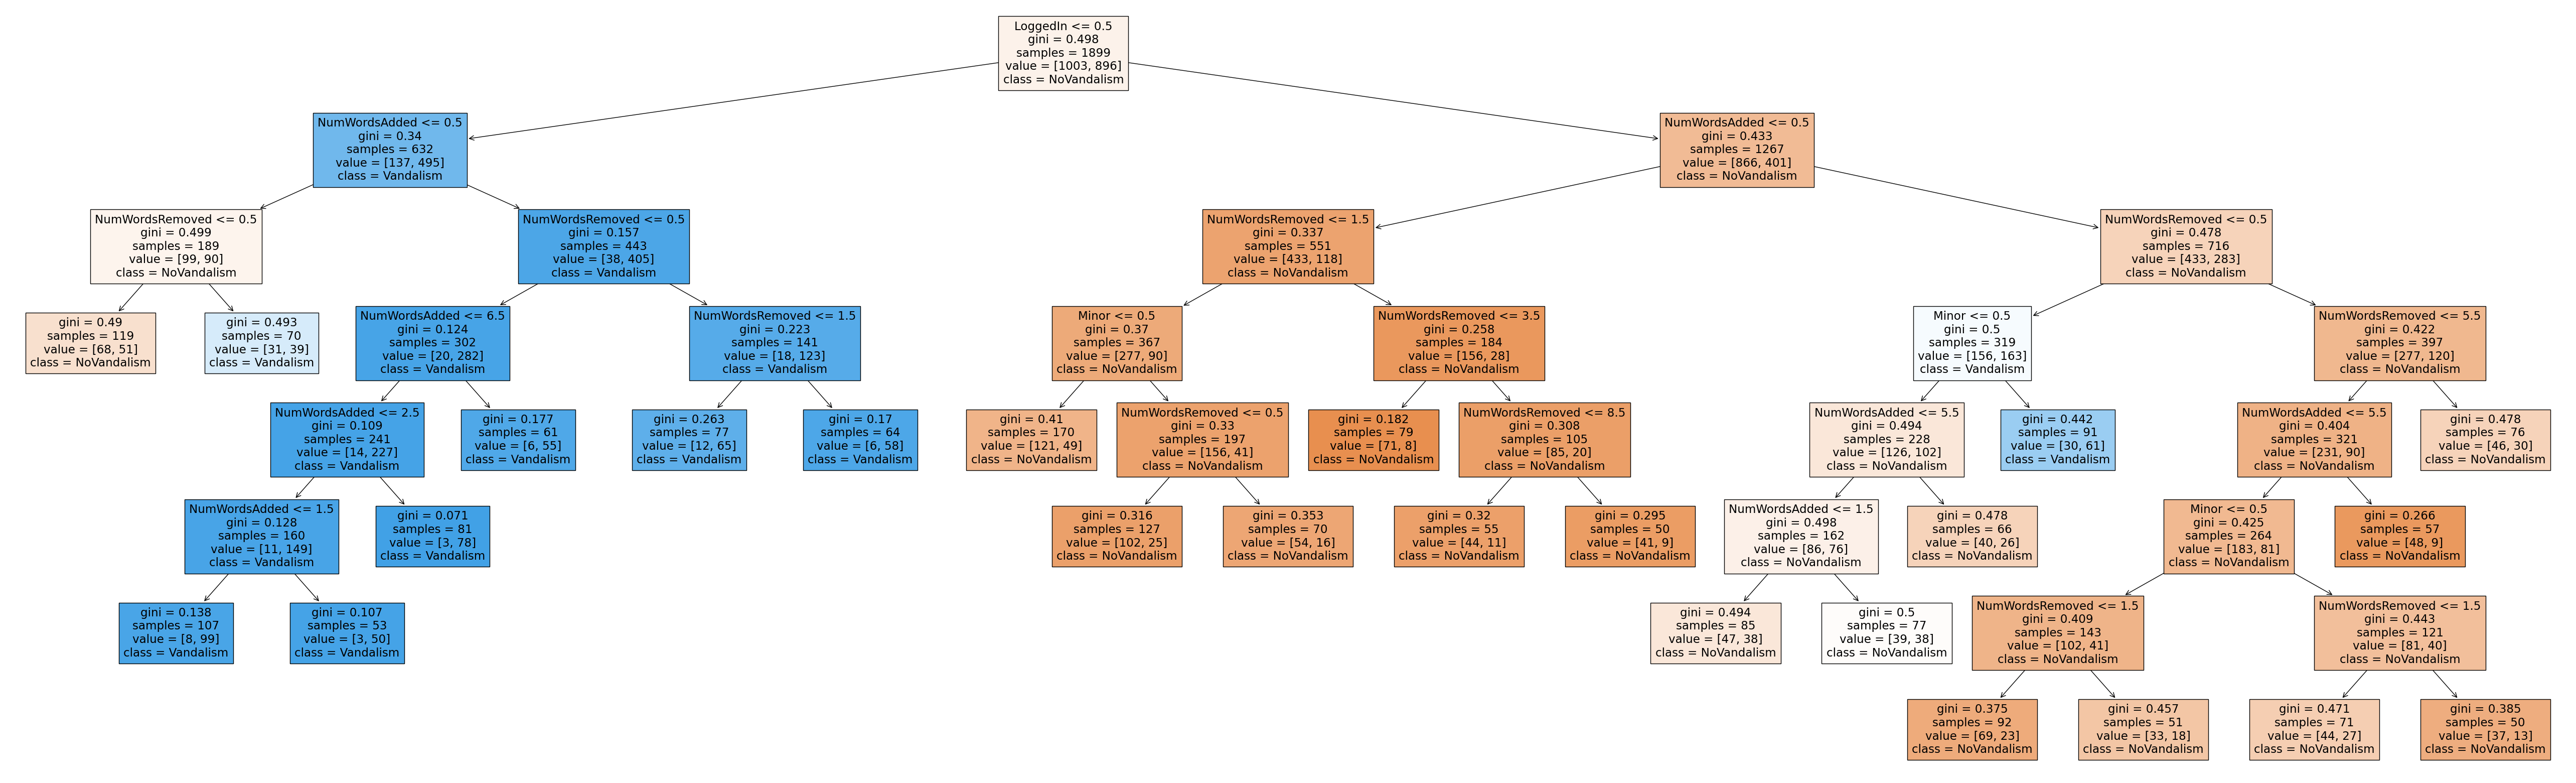

In [ ]:
#leafs = 50
dectree_50 = DecisionTreeClassifier(min_samples_leaf =50)
dectree_50.fit(x_train_1, y_train_1)

plt.figure(figsize = (66,20))
plot_tree(dectree_50, feature_names = x_train_1.columns, class_names = ['NoVandalism', 'Vandalism'], filled=True)
plt.show()

In [ ]:
#Predict ctree_50 against test data set.

y_pred_ctree_50 = dectree_50.predict(x_val)

pd.crosstab(y_val, y_pred_ctree_50)

col_0     0    1
Vandal          
0       374   51
1       177  212

In [ ]:
#Calculate accuracy of ctree_50
TP = 212
TN = 374
FP = 51
FN = 177
N = TP+TN+FP+FN
# accuracy = truths / total
acc_50 = (TP+TN)/N
print(acc_50)

0.7199017199017199


### c_tree = 100
> Accuracy = 71.01%

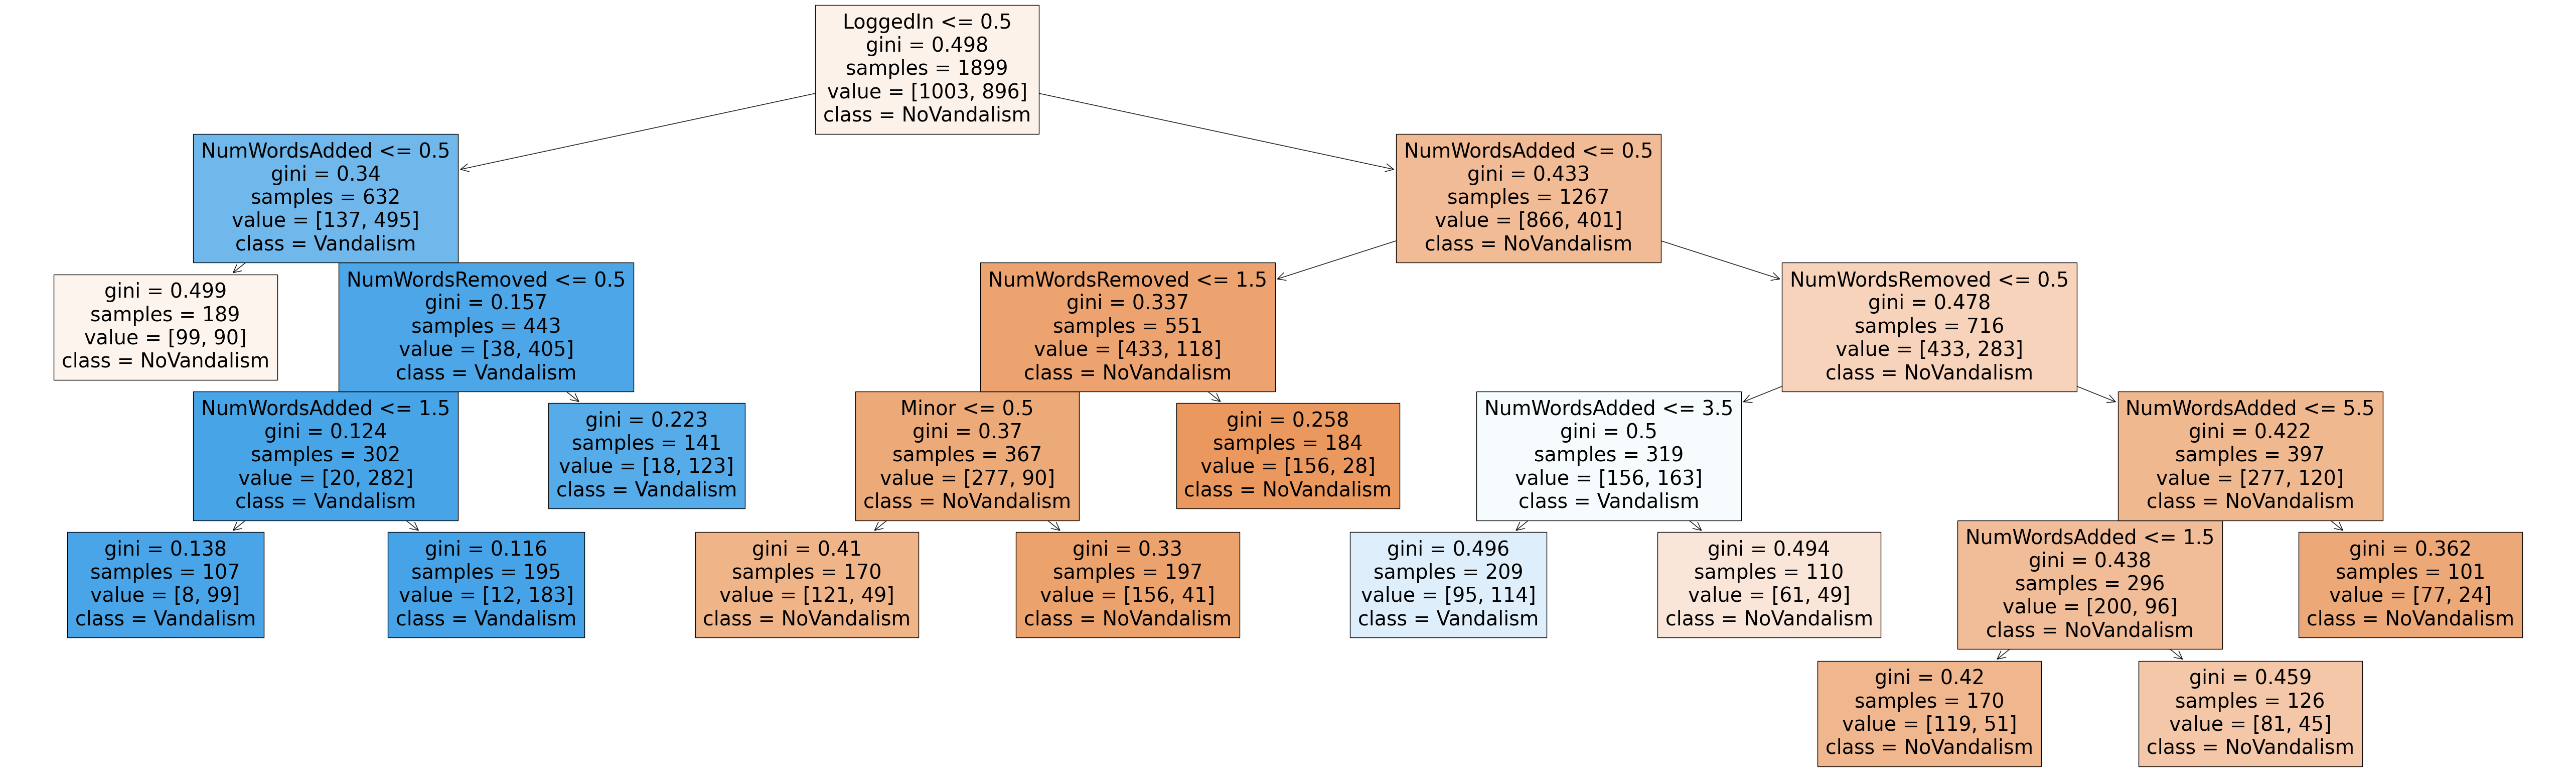

In [ ]:
#leafs = 100
dectree_100 = DecisionTreeClassifier(min_samples_leaf =100)
dectree_100.fit(x_train_1, y_train_1)

plt.figure(figsize = (66,20))
plot_tree(dectree_100, feature_names = x_train_1.columns, class_names = ['NoVandalism', 'Vandalism'], filled=True)
plt.show()

In [ ]:
#Predict ctree_100 against test data set.

y_pred_ctree_100 = dectree_100.predict(x_val)

pd.crosstab(y_val, y_pred_ctree_100)

col_0     0    1
Vandal          
0       367   58
1       178  211

In [ ]:
#Calculate accuracy of ctree_100
TP = 211
TN = 367
FP = 58
FN = 178
N = TP+TN+FP+FN
# accuracy = truths / total
acc_100 = (TP+TN)/N
print(acc_100)

0.7100737100737101


# c_i

Plot full CART tree.

Which variables were used in the tree?
> All five independent variables are used as classifiers in the the tree.

Which appear to be most significant?
> Althought we see all five variables, we see that 'NumWordsRemoved' and 'NumWordsAdded' are the strongest classifiers after the parent node of 'LoggedIn'. The classification trees further diverge based on the quantity of 'NumWordsRemoved' and 'NumWordsAdded' until we get to the leaves.

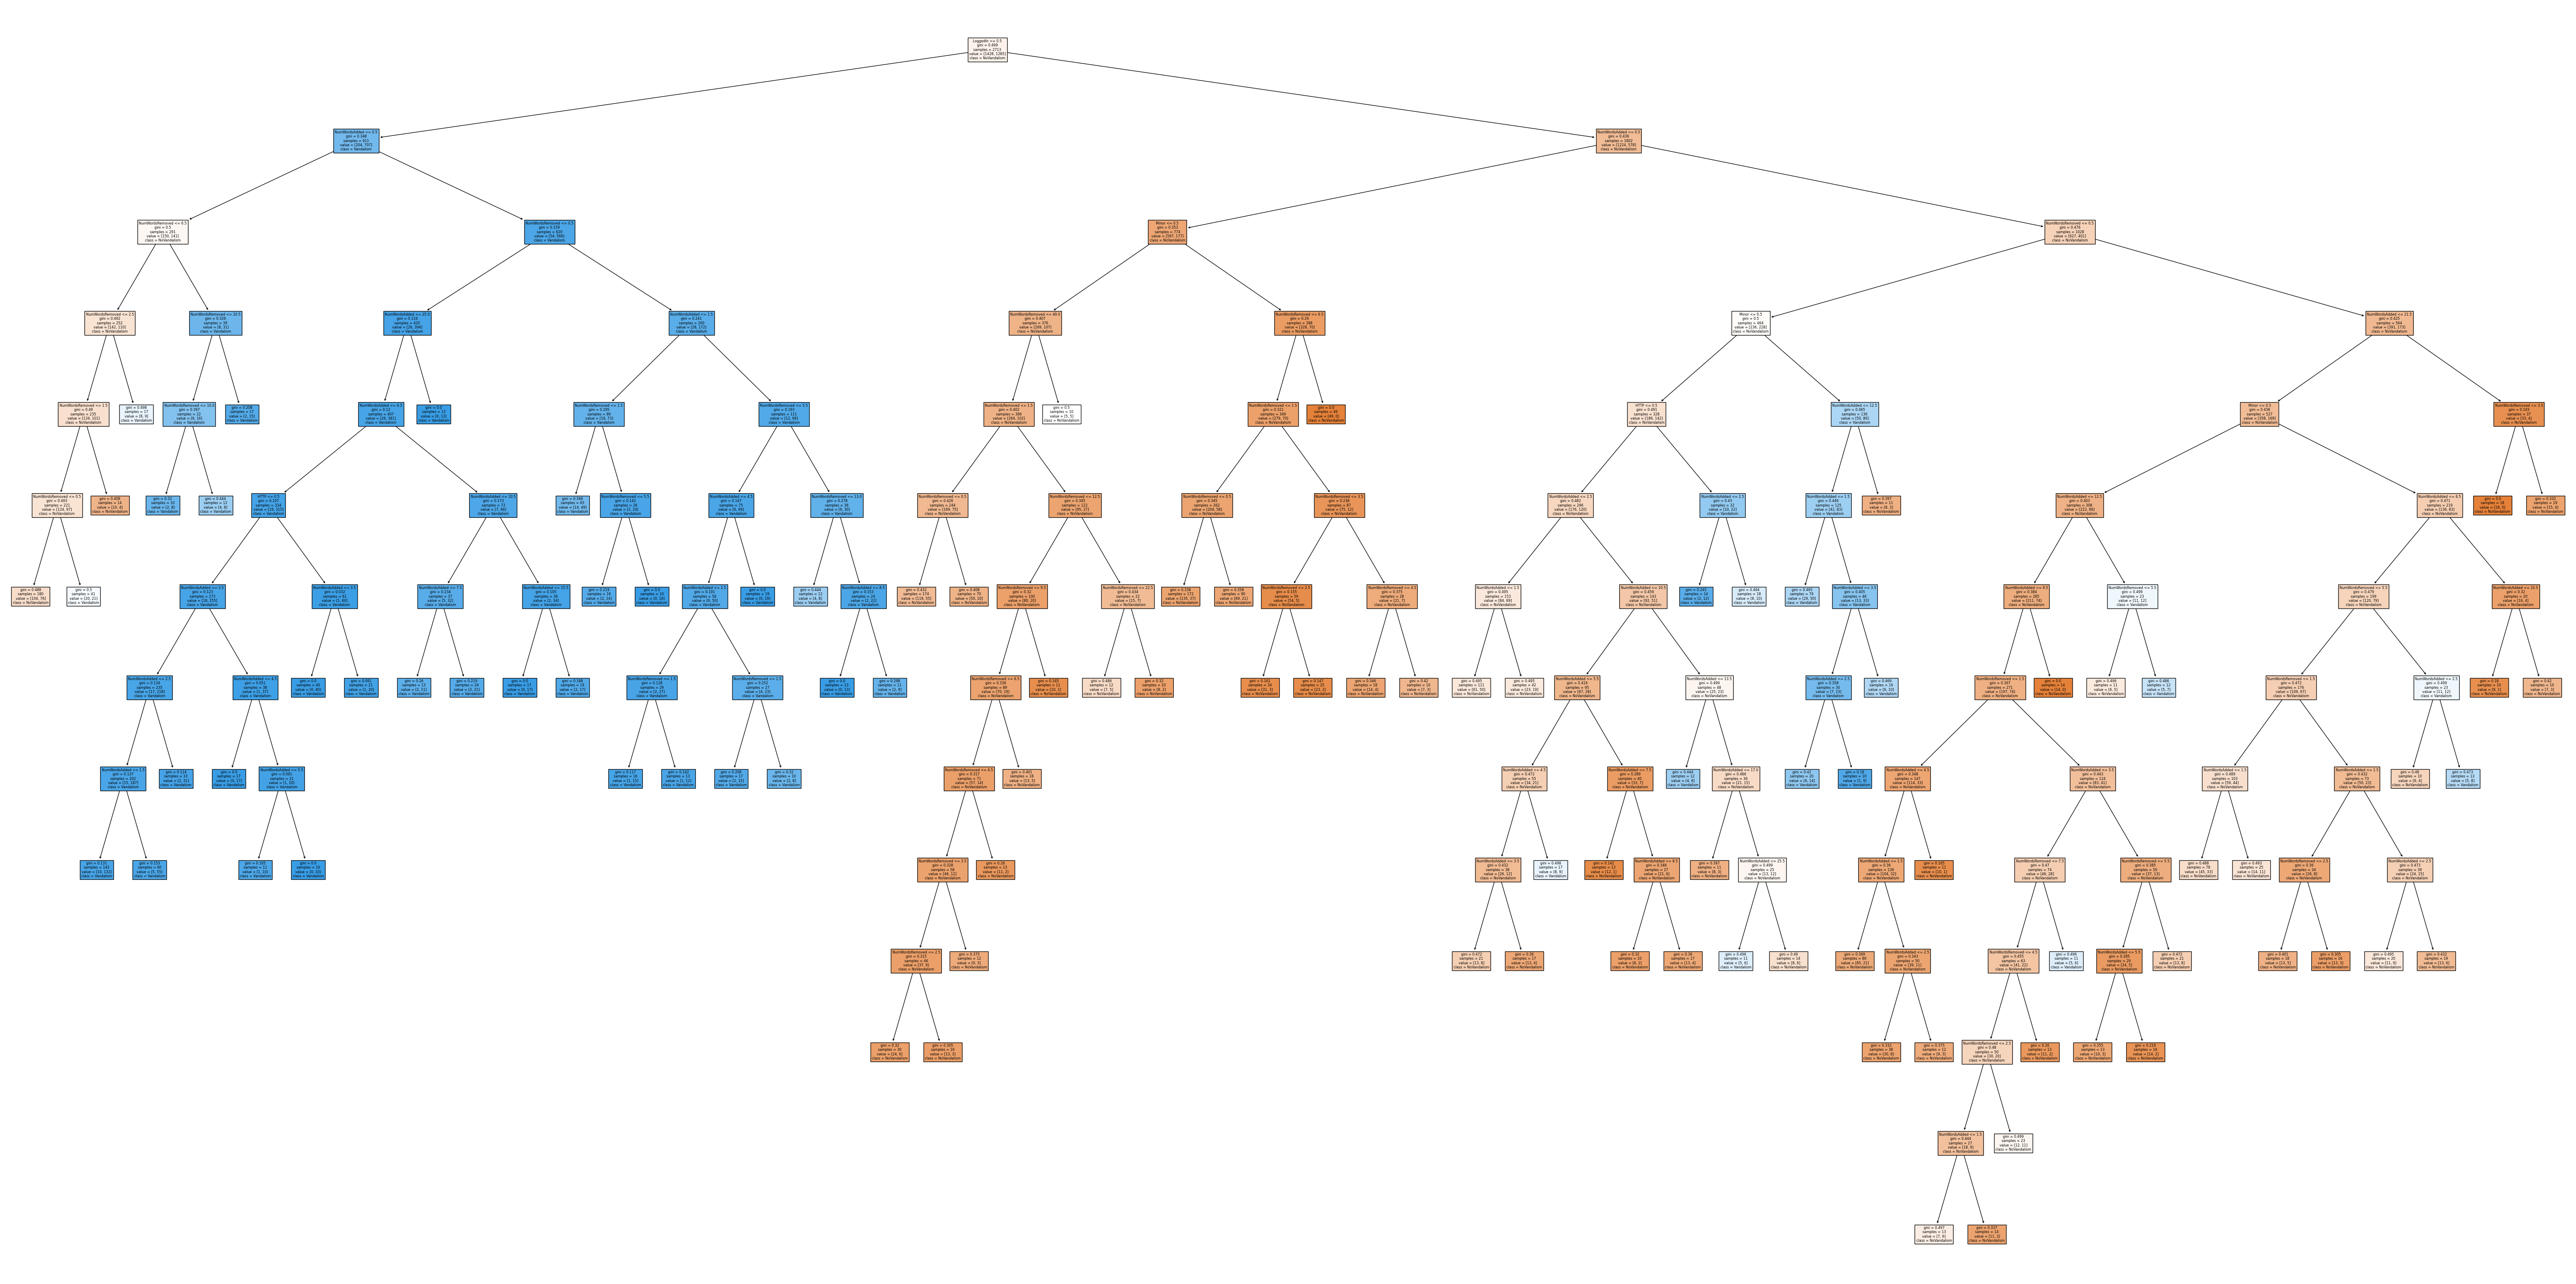

In [ ]:
# Use most accurate model dectree_10.
dectree_10_full = dectree_10.fit(x_train, y_train)

plt.figure(figsize = (80,40))

plot_tree(dectree_10_full, feature_names = x_train.columns, class_names = ['NoVandalism', 'Vandalism'], filled=True)
plt.show()

# c_ii

What is the accuracy of the model against test set?
> 74.98%

In [ ]:
# Predict against full test set

x_test = df_wiki_test.drop(['Vandal'], axis=1)
y_test = df_wiki_test['Vandal']

y_pred_ctree_10_full = dectree_10_full.predict(x_test)

pd.crosstab(y_test, y_pred_ctree_10_full)

col_0     0    1
Vandal          
0       547   86
1       205  325

In [ ]:
#Accuracy

TP = 325
TN = 547
FP = 86
FN = 205
N = TP+TN+FP+FN

acc_10_test = (TP+TN)/N
print(acc_10_test)

0.7497850386930353


In [ ]:
#Precision

prec_10_test = TP/(TP+FP)
print(prec_10_test)

0.7907542579075426


In [ ]:
#Recall

rec_10_test = TP/(TP+FN)
print(rec_10_test)

0.6132075471698113


# d

Now build a random forest model for Vandal, using all other variables as indepedent variables. Use training set.

Select reasonable parameter values, then compute accuracy of model.
> 74.12% accuracy using n_est = 1000

How does it compare to the CART model?
> The random forest model is slightly less accurate compared to 74.98% of decision tree model.

In [ ]:
# Use RandomForestClassifer module.
rdf = RandomForestClassifier(n_estimators = 1000)
rdf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
# Predict against test set.
y_pred_rdf = rdf.predict(x_test)

pd.crosstab(y_test, y_pred_rdf)

col_0     0    1
Vandal          
0       542   91
1       212  318

In [ ]:
#Accuracy of rdf
TP = 321
TN = 541
FP = 92
FN = 209
N = TP+TN+FP+FN

acc_rdf = (TP+TN)/N
print(acc_rdf)

0.7411865864144453


In [ ]:
#Recall

rec_rdf = TP/(TP+FN)
print(rec_rdf)

0.6056603773584905


# e

Do you think the model you built could be useful to detect vandalism?
> No, I do not think the model is good enough for detecting vandalism. Recall is only 60.57%, meaning there is still close to 40% of vandalism that passes through our model. For information platforms such as wikipedia, I believe a strong model should have recall ability of at least 90% even if it is overly-sensitive to false positives.

If you could collect more data about the edits, what variables would you want?
> Frequency of edits, I hypothesize a high correlation between frequency and vandalism.

> Geolocation of edits either via IP or GPS-cookies, I hypothesize certain locations or nation states may show high correlation of vandalism. Along with the number of distinct different IPs or geolocations contribute to edits may show correlation of vandalism.

> Total Number of times vandalism has occured on the page. I suspect previously vandalized pages will be subject to vandalism again.


Do you think this model could extend to other applications?
> On the topic of vandalism, we could use a similar model to extend to the physical realm by trying to detect crime in the physical realm. We test the different crimonlogy theories out there today such as Broken Windows theory or Social Disorganization theory, by gathering socioeconomic variables in order to attempt a model.